# Loan Approval Prediction

### Project Overview
This project uses the Loan Approval Prediction dataset from Kaggle to build models that predict loan status (approved or denied).


In [214]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [215]:
import pandas as pd

# Adjust the file name if necessary
data = pd.read_csv("loan_approval_dataset.csv")

# Display the first few rows
data.columns = data.columns.str.strip() # remove whitespace

### doing some one hot encoding for education, self_employed, and loan_status

In [217]:
encoder = OneHotEncoder(sparse_output=False)
categorical_features = ['education', 'self_employed', 'loan_status']
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Add encoded features back to the data
data = pd.concat([data, encoded_df], axis=1).drop(categorical_features, axis=1)

# verify that one hot encoding turns them into numerical values
print(data.columns)

# change columns for education and self_employed
data['education'] = data['education_ Graduate']
data = data.drop(['education_ Graduate', 'education_ Not Graduate'], axis=1)
data['self_employed'] = data['self_employed_ Yes']
data = data.drop(['self_employed_ Yes', 'self_employed_ No'], axis=1)

# and of course for loan_status
data['loan_status'] = data['loan_status_ Approved']
data = data.drop(['loan_status_ Approved', 'loan_status_ Rejected'], axis=1)



# lets see if that fixed the trick

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected'],
      dtype='object')


### scaling some features 

In [219]:
# List of numerical features to scale
numeric_features = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features. numerical features should now have a mean of 0 and std deviation of 1
data[numeric_features] = scaler.fit_transform(data[numeric_features])

### splitting some data

In [221]:
# Define features and target variable
X = data.drop('loan_status', axis=1)  # Features
y = data['loan_status']              # Target

# Split data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# making sure the number of labels match up
# print("Training set:", X_train.shape, y_train.shape)
# print("Validation set:", X_val.shape, y_val.shape)
# print("Test set:", X_test.shape, y_test.shape)

Training set: (2988, 12) (2988,)
Validation set: (640, 12) (640,)
Test set: (641, 12) (641,)


# train logistic regression model

In [223]:
# gonna be scaling data first
numeric_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                    'residential_assets_value', 'commercial_assets_value',
                    'luxury_assets_value', 'bank_asset_value']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])



# Initialize the model
logistic_model = LogisticRegression(solver='liblinear', max_iter=500)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=500, solver='liblinear')

# great, now lets validate the model

In [225]:
# predict on the validation set
y_val_pred = logistic_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Validation Metrics for Logistic Regression:
Accuracy: 0.90
Precision: 0.91
Recall: 0.93
F1-Score: 0.92


# looks good! lets see the confusion matrix

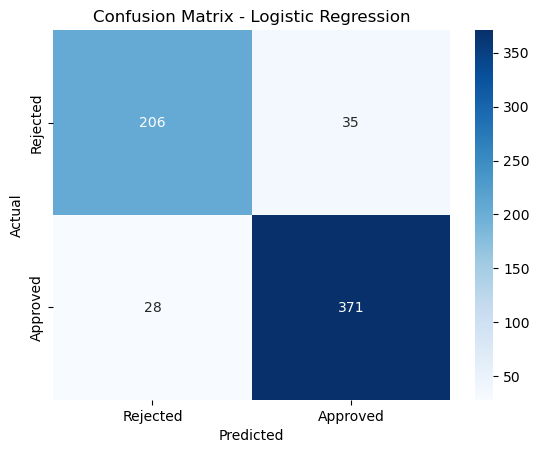

In [229]:
confu_matrix = confusion_matrix(y_val, y_val_pred)

# plot the matrix
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Rejected", "Approved"], 
            yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()